In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, TimeDistributed, Dense, Dropout, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
TB=0
TE=3343
INPUT_SIZE=10
OUTPUT_SIZE=1
BATCH_SIZE=1
TIME_STEPS=1
CELL_SIZE=10
HIDD=100

In [3]:
f=open('test_5.csv') 
df=pd.read_csv(f)     
data=df.iloc[:,2:13].values

In [4]:
def get_train_data(train_begin=TB,train_end=TE):
    global train_mean, train_std
    data_train=data[train_begin:train_end]
    train_mean=np.mean(data_train,axis=0)
    train_std=np.std(data_train,axis=0)
    normalized_train_data=(data_train-train_mean)/train_std
    train_x = normalized_train_data[:,:10]
    train_y = normalized_train_data[:,10,np.newaxis]
    return train_x[:, np.newaxis], train_y[:,:]
train_x, train_y=get_train_data()

In [5]:
def get_test_data(test_begin=TE):
    global test_mean, test_std
    data_test=data[test_begin:]
    test_mean=np.mean(data_test,axis=0)
    test_std=np.std(data_test,axis=0)
    test_data=(data_test-test_mean)/test_std
    test_x=test_data[:,:10]
    test_y=test_data[:,10,np.newaxis]
    return test_x[:, np.newaxis], test_y[:, np.newaxis]
test_x, test_y=get_test_data()

In [6]:
model = Sequential()

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=CELL_SIZE, return_sequences=True, stateful=True))

model.add(Dropout(0.2))

model.add(LSTM(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), output_dim=CELL_SIZE, stateful=True))

model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))
#model.compile(optimizer='rmsprop', loss='mse')
model.compile(optimizer='adam', loss='mse')

C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=10, return_sequences=True, batch_input_shape=(1, 1, 10), stateful=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=10, batch_input_shape=(1, 1, 10), stateful=True)`
  import sys


In [18]:
train_history=model.fit(train_x, train_y, batch_size=BATCH_SIZE, epochs=101, verbose=2)

Epoch 1/101
11s - loss: 0.0831
Epoch 2/101
11s - loss: 0.0805
Epoch 3/101
11s - loss: 0.0869
Epoch 4/101
10s - loss: 0.0817
Epoch 5/101
10s - loss: 0.0786
Epoch 6/101
10s - loss: 0.0735
Epoch 7/101
10s - loss: 0.0763
Epoch 8/101
10s - loss: 0.0785
Epoch 9/101
10s - loss: 0.0924
Epoch 10/101
10s - loss: 0.0788
Epoch 11/101
11s - loss: 0.0807
Epoch 12/101
11s - loss: 0.0861
Epoch 13/101
11s - loss: 0.0792
Epoch 14/101
11s - loss: 0.0795
Epoch 15/101
11s - loss: 0.0764
Epoch 16/101
11s - loss: 0.0820
Epoch 17/101
11s - loss: 0.0809
Epoch 18/101
11s - loss: 0.0867
Epoch 19/101
11s - loss: 0.0738
Epoch 20/101
10s - loss: 0.0758
Epoch 21/101
10s - loss: 0.0857
Epoch 22/101
10s - loss: 0.0808
Epoch 23/101
10s - loss: 0.0779
Epoch 24/101
10s - loss: 0.0872
Epoch 25/101
10s - loss: 0.0762
Epoch 26/101
10s - loss: 0.0647
Epoch 27/101
10s - loss: 0.0766
Epoch 28/101
11s - loss: 0.0964
Epoch 29/101
11s - loss: 0.0874
Epoch 30/101
11s - loss: 0.0861
Epoch 31/101
11s - loss: 0.0740
Epoch 32/101
11s 

In [48]:
trainScore = model.evaluate(train_x, train_y, batch_size=BATCH_SIZE, verbose=1)
print(trainScore)

3332/3337 [============================>.] - ETA: 0s0.0239708301092


In [19]:
predict=model.predict(test_x, batch_size=BATCH_SIZE,verbose=1)
print(predict)

 89/100 [=========================>....] - ETA: 0s[[-1.65992212]
 [-1.94069791]
 [-1.97397637]
 [-2.04539013]
 [-1.97653437]
 [-1.84139466]
 [-1.86042976]
 [-1.52886176]
 [-1.45167136]
 [-1.57263637]
 [-1.66534305]
 [-1.370996  ]
 [-1.36135411]
 [-1.23083615]
 [-1.22776103]
 [-1.20718956]
 [-1.15272284]
 [-1.17085433]
 [-1.33548141]
 [-1.39210987]
 [-1.3949964 ]
 [-1.68458486]
 [-1.25674415]
 [-1.05772161]
 [-0.72406048]
 [-0.73077983]
 [-0.63331705]
 [-0.64450288]
 [ 0.08105984]
 [ 0.20847303]
 [-0.27812856]
 [-0.19841486]
 [-0.4211973 ]
 [-0.33208215]
 [-0.44630563]
 [-0.27842551]
 [-0.32354641]
 [-0.52921093]
 [-0.3886829 ]
 [ 0.26689932]
 [ 0.35468259]
 [ 0.90310454]
 [ 0.8106997 ]
 [ 0.94512254]
 [ 0.92521924]
 [ 0.97072703]
 [ 1.07865405]
 [ 0.91790873]
 [ 0.88294613]
 [ 0.99270302]
 [ 0.98771864]
 [ 1.06396294]
 [ 0.8904857 ]
 [ 0.47914207]
 [ 0.78307295]
 [ 0.90911114]
 [ 0.83049899]
 [ 0.95053095]
 [ 1.04043818]
 [ 1.12284112]
 [ 0.92551017]
 [ 0.72093713]
 [ 0.4519406 ]
 [ 0.

In [20]:
predict.reshape(-1)
test_predict=np.array(predict)*test_std[3]+test_mean[3]
test_y_=np.array(test_y)*test_std[10]+test_mean[10]

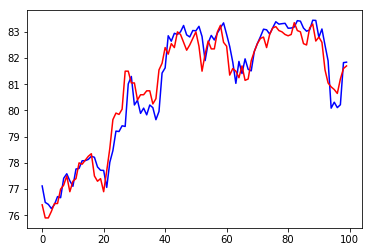

In [21]:
plt.figure()
plt.plot(list(range(len(test_predict))), test_predict, color='b')
plt.plot(list(range(len(test_y_))), test_y_.reshape(-1), color='r')
plt.show()

In [17]:
x=0
for i in range(50,len(test_predict),1):
    print(abs(test_predict[i]-test_y_[i]))
    x += abs(test_predict[i]-test_y_[i])
print("======================")
print(x/50)

[[ 0.05231476]]
[[ 0.67786102]]
[[ 1.17282867]]
[[ 0.75412598]]
[[ 0.06105194]]
[[ 0.54308929]]
[[ 0.30644073]]
[[ 0.04204559]]
[[ 0.11820984]]
[[ 0.61958923]]
[[ 0.32018738]]
[[ 1.12060394]]
[[ 0.7370163]]
[[ 0.74971008]]
[[ 0.43715668]]
[[ 1.02730865]]
[[ 0.70863495]]
[[ 0.50575562]]
[[ 1.15202179]]
[[ 0.06250763]]
[[ 0.00225525]]
[[ 0.11681366]]
[[ 0.23916168]]
[[ 0.56022034]]
[[ 0.09200134]]
[[ 0.06604614]]
[[ 0.06783752]]
[[ 0.10440369]]
[[ 0.14983368]]
[[ 0.28805695]]
[[ 0.13801422]]
[[ 0.09798584]]
[[ 0.2665802]]
[[ 0.17801208]]
[[ 0.2326355]]
[[ 0.46802063]]
[[ 0.4557724]]
[[ 0.16327515]]
[[ 0.06201477]]
[[ 0.61242828]]
[[ 0.12695007]]
[[ 0.39246216]]
[[ 0.96081085]]
[[ 0.16124268]]
[[ 0.60843506]]
[[ 0.33974915]]
[[ 0.35430756]]
[[ 0.84512634]]
[[ 0.63658295]]
[[ 0.25770264]]
[[ 0.40426398]]


In [195]:
np.savetxt('Output_test_predict.csv', test_predict, delimiter=",")
np.savetxt('Output_test_Y.csv', test_y_, delimiter=",")